### Question 3

#### 3.(a) Download and unzip The Face Dataset
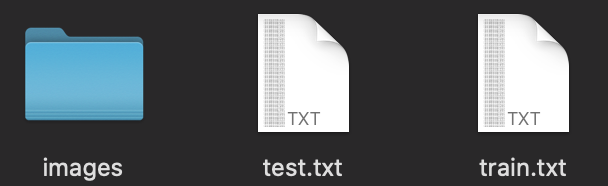

#### 3.(b) Load the training set into a matrix X: there are 540 training images in total, each has 50×50 pixels that need to be concatenated into a 2500-dimensional vector. So the size of X should be 540×2500, where each row is a ﬂattened face image. Pick a face image from X and display that image in grayscale. Do the same thing for the test set. The size of matrix X test for the test set should be 100×2500.

(540, 2500) (540,)


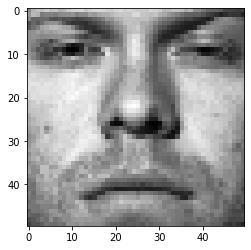

(100, 2500) (100,)


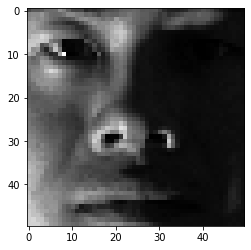

In [2]:
import imageio
import numpy as np 
from matplotlib import pylab as plt 
import matplotlib.cm as cm 
#load data
train_labels, train_data = [], [] 
for line in open('train.txt'):
    im = imageio.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1]) 
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
#plot a train image
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r) 
plt.show()

test_labels, test_data = [], [] 
for line in open('test.txt'):
    im = imageio.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1]) 
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
#plot a test image
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r) 
plt.show()

#### 3.(c) Average Face.

[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


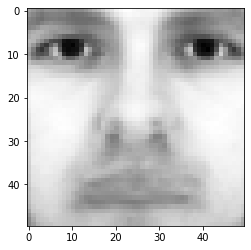

In [3]:
mu = np.mean(train_data, axis= 0)
print(mu)
plt.imshow(mu.reshape(50,50),cmap = cm.Greys_r)

#### 3.(d) Mean Subtraction.

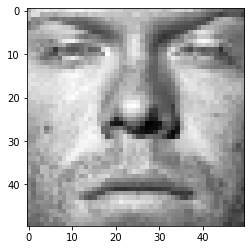

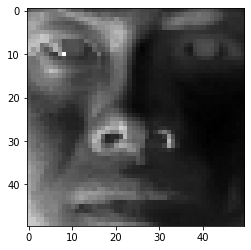

In [4]:
train_sub=train_data-mu
test_sub=test_data-mu
plt.imshow(train_sub[10, :].reshape(50,50), cmap = cm.Greys_r) 
plt.show()
plt.imshow(test_sub[10, :].reshape(50,50), cmap = cm.Greys_r) 
plt.show()

#### 3.(e) Eigenface

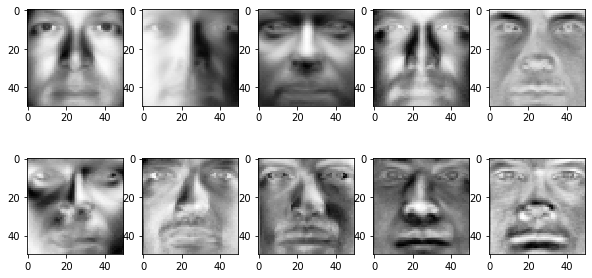

In [5]:
X=train_sub
u,s,v = np.linalg.svd(X)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(v[i, :].reshape(50,50), cmap = cm.Greys_r) 
plt.show()

#### 3.(f) Eigenface Feature.

In [6]:
X_test=test_sub
def Eigenface_Feature(r):
    V=v[:r,:]
    F=np.dot(X,V.T)
    
    V_test=V
    F_test=np.dot(X_test,V_test.T)
    return F, F_test

#### 3.(g) Face Recognition.

In [9]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#r=10
F,F_test=Eigenface_Feature(10)
F_label=train_labels
F_test_label=test_labels
lr=LogisticRegression(solver='lbfgs',max_iter=10000)
ovr=OneVsRestClassifier(lr)
ovr.fit(F,F_label)           
print(ovr.score(F_test,F_test_label))

0.8


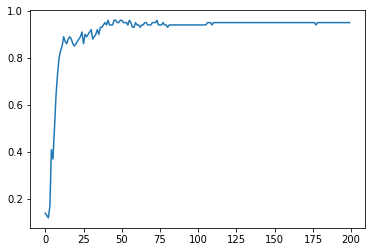

In [10]:
#r=1-200

acc=[]
R=[]
for i in range(200):
    F,F_test=Eigenface_Feature(i+1)
    ovr.fit(F,F_label)
    acc.append(ovr.score(F_test,F_test_label))
    R.append(i)
plt.plot(R,acc)    
plt.show()